# **Load Data**

In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download saife245/malaria-parasite-image-malaria-species

100% 2.17G/2.18G [00:15<00:00, 164MB/s]
100% 2.18G/2.18G [00:15<00:00, 147MB/s]


In [ ]:
!unzip "/content/malaria-parasite-image-malaria-species.zip" -d "/content/"

Archive:  /content/malaria-parasite-image-malaria-species.zip
  inflating: /content/DatasetDescription.pdf  
  inflating: /content/Falciparum/gt/1305121398-0001-R_S.tif  
  inflating: /content/Falciparum/gt/1305121398-0003-R.png  
  inflating: /content/Falciparum/gt/1305121398-0004-R.png  
  inflating: /content/Falciparum/gt/1305121398-0005-T.png  
  inflating: /content/Falciparum/gt/1305121398-0006-R.png  
  inflating: /content/Falciparum/gt/1305121398-0007-R.png  
  inflating: /content/Falciparum/gt/1305121398-0008-R.png  
  inflating: /content/Falciparum/gt/1305121398-0010-S.tif  
  inflating: /content/Falciparum/gt/1305121398-0011-S.tif  
  inflating: /content/Falciparum/gt/1305121398-0012-S.tif  
  inflating: /content/Falciparum/gt/1305121398-0013-S.tif  
  inflating: /content/Falciparum/gt/1305121398-0014-S.tif  
  inflating: /content/Falciparum/gt/1305121398-0015-S.tif  
  inflating: /content/Falciparum/gt/1305121398-0016-T.tif  
  inflating: /content/Falciparum/gt/1305121398-00

# **Malaria:Detail Analysis on Malaria Species**

In [ ]:
import re
import math
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [ ]:
cols, rows = 4, 3
def grid_display(list_of_images, no_of_columns=2, figsize=(15,15), title = False):
    fig = plt.figure(figsize=figsize)
    column = 0
    z = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        if title:
            if i >= no_of_columns:
                plt.title(titles[z])
                z +=1
            else:
                plt.title(titles[i])
        plt.imshow(list_of_images[i])
        plt.axis('off')

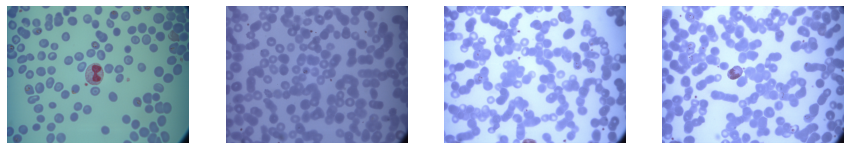

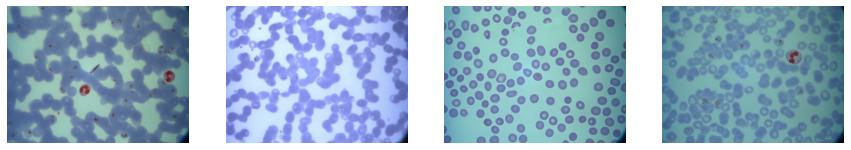

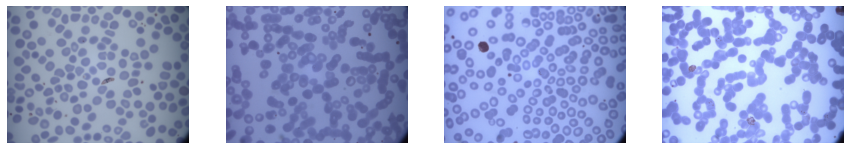

In [ ]:
TRAIN = '/content/Falciparum/img/'
IMAGE_SIZE = 1024
n_imgs = 12
img_filenames = os.listdir(TRAIN)[:n_imgs]
img_filenames[:3]
image=[]
for file_name in img_filenames:
    img = cv2.imread(TRAIN +file_name)
    image.append(img)
grid_display(image, 4, (15,15))

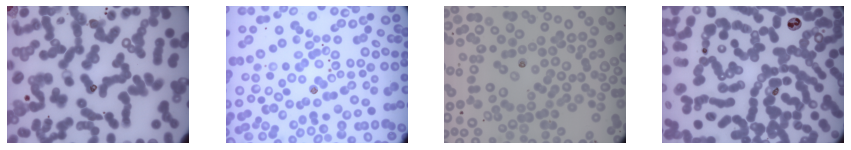

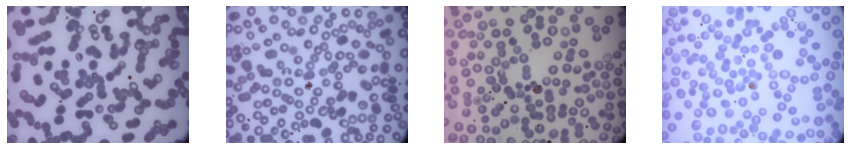

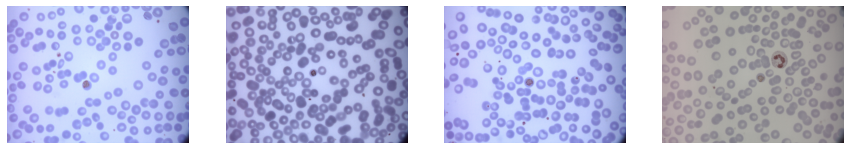

In [ ]:
TRAIN = '/content/Malariae/img/'
IMAGE_SIZE = 1024
n_imgs = 12
img_filenames = os.listdir(TRAIN)[:n_imgs]
img_filenames[:3]
image=[]
for file_name in img_filenames:
    img = cv2.imread(TRAIN +file_name)
    image.append(img)
grid_display(image, 4, (15,15))

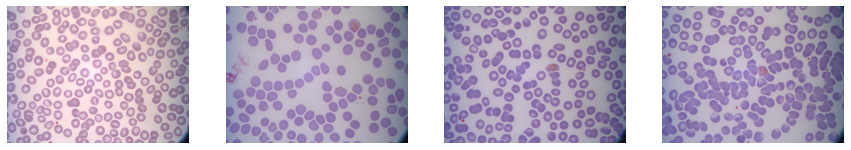

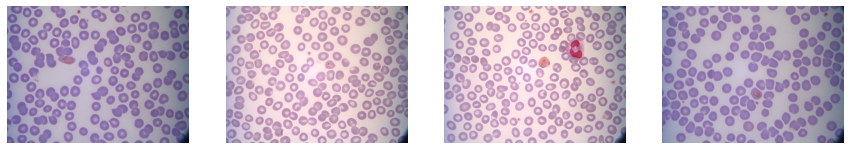

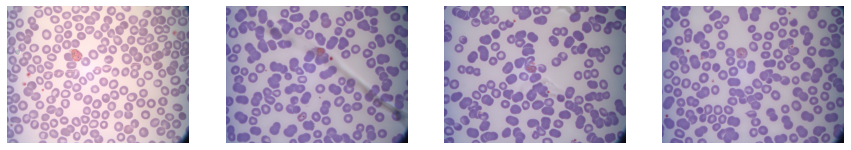

In [ ]:
TRAIN = '/content/Ovale/img/'
IMAGE_SIZE = 1024
n_imgs = 12
img_filenames = os.listdir(TRAIN)[:n_imgs]
img_filenames[:3]
image=[]
for file_name in img_filenames:
    img = cv2.imread(TRAIN +file_name)
    image.append(img)
grid_display(image, 4, (15,15))

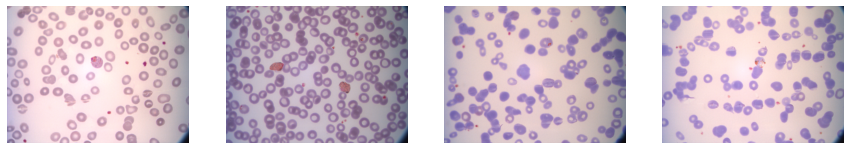

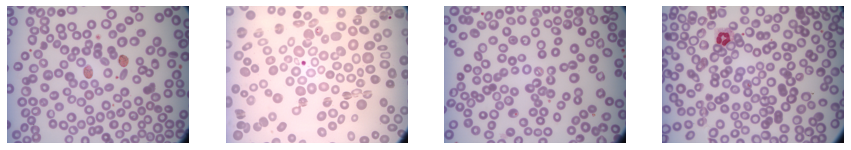

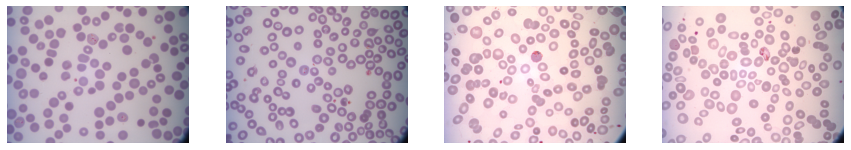

In [ ]:
TRAIN = '/content/Vivax/img/'
IMAGE_SIZE = 1024
n_imgs = 12
img_filenames = os.listdir(TRAIN)[:n_imgs]
img_filenames[:3]
image=[]
for file_name in img_filenames:
    img = cv2.imread(TRAIN +file_name)
    image.append(img)
grid_display(image, 4, (15,15))

# **Use Noise Reduction**

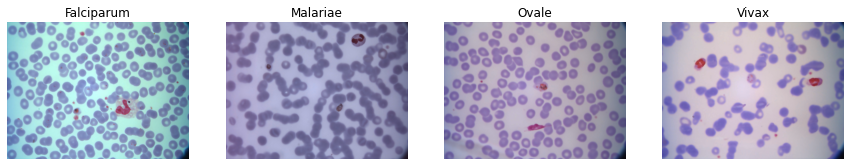

In [ ]:
image_list = ['/content/Falciparum/img/1701151546-0013-R_T.tif',
              '/content/Malariae/img/1401080976-0003-T.tif',
              '/content/Ovale/img/1707180816-0019-S.tif',
             '/content/Vivax/img/1709041080-0014-R.tif']
image_all=[]
titles = ['Falciparum', 'Malariae', "Ovale", 'Vivax']
for image_id in image_list:
    img = cv2.imread(image_id)
    #Reducing Noise
    result = cv2.fastNlMeansDenoisingColored(img,None,20,10,7,21)
    image_all.append(result)
grid_display(image_all, 4, (15,15), title = True)

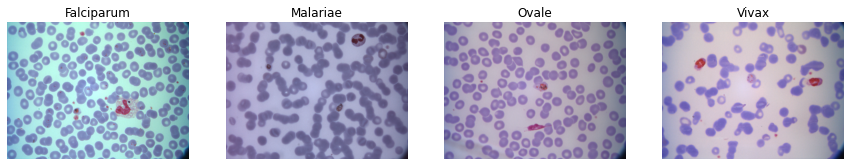

In [ ]:
image_list = ['/content/Falciparum/img/1701151546-0013-R_T.tif',
              '/content/Malariae/img/1401080976-0003-T.tif',
              '/content/Ovale/img/1707180816-0019-S.tif',
             '/content/Vivax/img/1709041080-0014-R.tif']
image_all=[]
titles = ['Falciparum', 'Malariae', "Ovale", 'Vivax']
for image_id in image_list:
    img = cv2.imread(image_id)
#     #Gaussian Blur
    blur_image = cv2.GaussianBlur(img, (7,7), 0)
    image_all.append(blur_image)
grid_display(image_all, 4, (15,15), title = True)

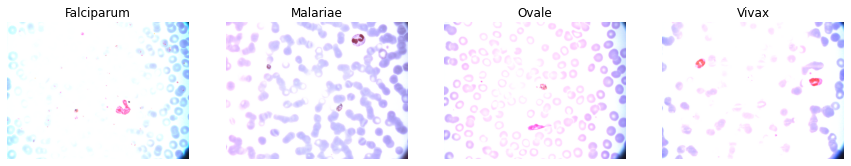

In [ ]:
image_list = ['/content/Falciparum/img/1701151546-0013-R_T.tif',
              '/content/Malariae/img/1401080976-0003-T.tif',
              '/content/Ovale/img/1707180816-0019-S.tif',
             '/content/Vivax/img/1709041080-0014-R.tif']
image_all=[]
titles = ['Falciparum', 'Malariae', "Ovale", 'Vivax']
for image_id in image_list:
    img = cv2.imread(image_id)
    #Adjusted contrast
    contrast_img = cv2.addWeighted(img, 2.005, np.zeros(img.shape, img.dtype), 0, 0)
    image_all.append(contrast_img)
grid_display(image_all, 4, (15,15), title = True)

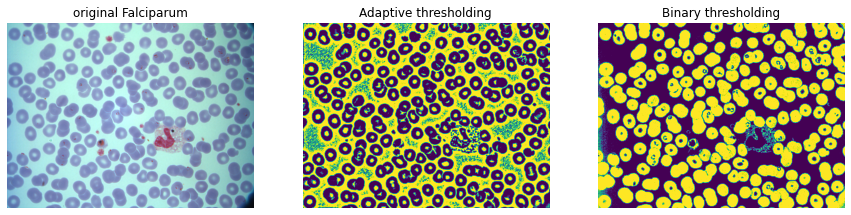

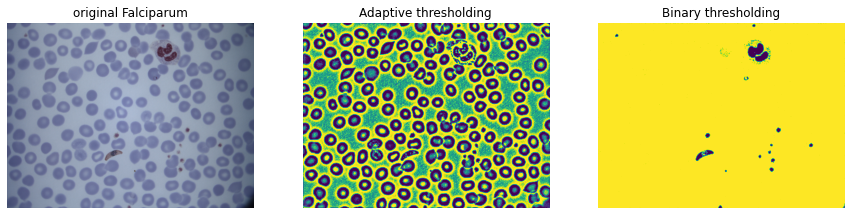

In [ ]:
image_list = ['/content/Falciparum/img/1701151546-0013-R_T.tif',
'/content/Falciparum/img/1603223711-0003-T_R.tif']
image_all=[]
titles = ['original Falciparum', 'Adaptive thresholding', "Binary thresholding"]
for image_id in image_list:
    img = cv2.imread(image_id)
    image_all.append(img)
    #Adaptive Thresholding..
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
    image_all.append(thresh1)
    #Binary Thresholding...
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    res, thresh = cv2.threshold(hsv[:, :, 0], 20, 255, cv2.THRESH_BINARY_INV)
    image_all.append(thresh)
grid_display(image_all, 3, (15,15), title = True)